In [93]:
import pandas as pd
import numpy as np
import math
from skimage import io #Image processing way 1
import matplotlib.pyplot as plt
import matplotlib.ticker as tk #This is used to format ticker in graphs
from PIL import Image #Image processing way 2
from skimage.color import rgb2gray
from skimage.util import crop
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"  # for matplotlib 2.1 and above, uses JavaScript

In [94]:
#Create Lists of names and ages
names = ['Avi','Ben','Cari','David','Eron','Fabian','Giger']
np.random.seed(7)
ages = np.random.randint(12,85,len(names))
print(names,ages)

['Avi', 'Ben', 'Cari', 'David', 'Eron', 'Fabian', 'Giger'] [59 80 37 79 35 69 26]


In [95]:
#Creation of dictionary
#Using Zip Command (Easy)
mydict = dict(zip(names,ages))
#Using a Dictionary Comprehension (based on the list locations)
#Dictionary comprehension 
mydiccom = {names[i]:ages[i] for i in range(len(ages))}
print(mydiccom)
print(mydict)

{'Avi': 59, 'Ben': 80, 'Cari': 37, 'David': 79, 'Eron': 35, 'Fabian': 69, 'Giger': 26}
{'Avi': 59, 'Ben': 80, 'Cari': 37, 'David': 79, 'Eron': 35, 'Fabian': 69, 'Giger': 26}


In [96]:
#Convert ages to np.array
ages = np.array(ages)

#Find max age in dictionary
maxval = np.max(ages)

#return all keys where value equals maxvalue
maxvaluekey = list(mydict.keys())[list(mydict.values()).index(maxval)]
maxvalueindex = list(mydict.values()).index(maxval)
print('Max Value:', maxval,'|','Max Key:', maxvaluekey,'|','Max Value Index:',maxvalueindex)


Max Value: 80 | Max Key: Ben | Max Value Index: 1


[[[ 97 152 208]
  [ 99 154 210]
  [ 99 154 208]
  ...
  [ 47  95 157]
  [ 31  95 157]
  [ 58  99 145]]

 [[100 152 209]
  [102 154 211]
  [101 154 208]
  ...
  [ 44  96 154]
  [ 34  94 156]
  [ 62 100 149]]

 [[101 153 210]
  [102 154 211]
  [101 154 208]
  ...
  [ 41  97 154]
  [ 35  95 158]
  [ 60 100 151]]

 ...

 [[ 55  87  20]
  [ 64  93  27]
  [ 75 100  35]
  ...
  [ 47  73  12]
  [ 50  74  14]
  [ 47  71   9]]

 [[ 52  82  20]
  [ 60  91  24]
  [ 67  98  31]
  ...
  [ 51  73  11]
  [ 53  73  10]
  [ 51  71   8]]

 [[ 46  83  16]
  [ 56  86  24]
  [ 66  92  31]
  ...
  [ 50  71  12]
  [ 53  73  14]
  [ 52  72  13]]]


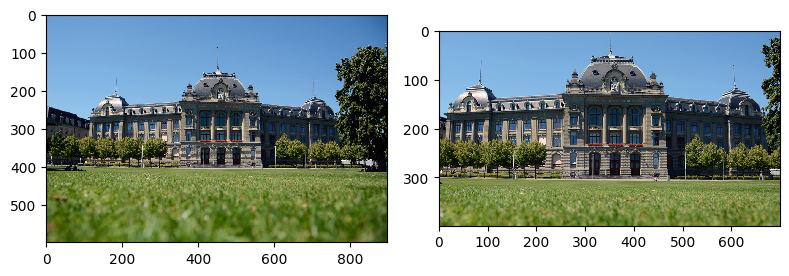

"\n\n#Crop - Option 2 using PIL import Image!!!\n#Open Image\nimage = Image.open('C:/Users/Maaya/Desktop/unibe.jpg')\n#Show Original Image\nimage.show()\n\n#Way one to get figure size using numpy array (Y,X) [height, width] using skimage\nimagearr = np.array(image)\n#Check image size! \nprint(imagearr.shape)\n\n#Way two to get image size! image.size (X,Y) [width, height] using --- from PIL import image\nprint(image.size)\nwidth, height = image.size\n#Crop Image using the crop method Option one - either use shape or size function.\n#im = image.crop((crop, crop, imagearr.shape[1]-crop, imagearr.shape[0]-crop))\n#Crop Image using the crop method Option two\nim = image.crop((crop, crop, width-crop, height-crop))\nim.show()\n        \n#\nimage.close()\nim.close()\n"

In [97]:
#Cropping an image
#Define Variables row and coulumn variavble are used for the subplot command
row = 1
column = 2
crop = 100

#Create the figure size to located the graphs
fig = plt.figure(figsize=(8,8))
imagepath = 'C:/Users/Maaya/Desktop/unibe.jpg'
imageread = io.imread(imagepath)
print(imageread)
#Image Before cropping
#fig subplot with 1 row and 2 columns -> plot-1!
fig.add_subplot(row,column,1), io.imshow(imageread)

newimage = imageread[crop:imageread.shape[0]-crop,crop:imageread.shape[1]-crop]
#Image after cropping
#fig subplot with 1 row and 2 columns -> plot-2!
fig.add_subplot(row,column,2), io.imshow(newimage)
io.show()
'''

#Crop - Option 2 using PIL import Image!!!
#Open Image
image = Image.open('C:/Users/Maaya/Desktop/unibe.jpg')
#Show Original Image
image.show()

#Way one to get figure size using numpy array (Y,X) [height, width] using skimage
imagearr = np.array(image)
#Check image size! 
print(imagearr.shape)

#Way two to get image size! image.size (X,Y) [width, height] using --- from PIL import image
print(image.size)
width, height = image.size
#Crop Image using the crop method Option one - either use shape or size function.
#im = image.crop((crop, crop, imagearr.shape[1]-crop, imagearr.shape[0]-crop))
#Crop Image using the crop method Option two
im = image.crop((crop, crop, width-crop, height-crop))
im.show()
        
#
image.close()
im.close()
'''


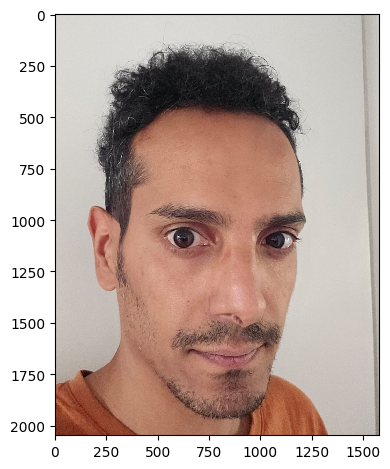

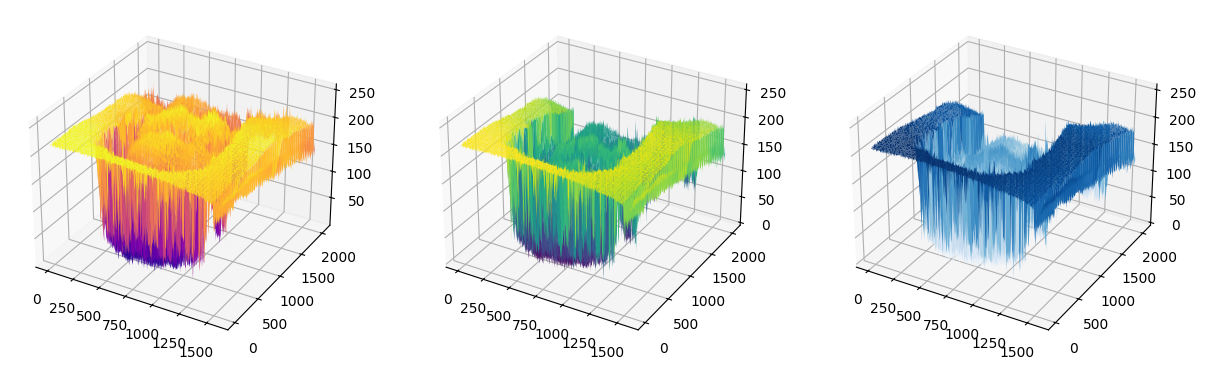

In [122]:
path = 'C:/Users/Maaya/Desktop/Maayan Hagbi.jpg'
image = io.imread(path)
io.imshow(image)
imager = np.array(image[:,:,0])
imageg = np.array(image[:,:,1])
imageb = np.array(image[:,:,2])

#prepare meshgrid
X,Y = np.meshgrid(np.arange(image.shape[1]),np.arange(image.shape[0]))

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,3,1,projection='3d')
ax1 = fig.add_subplot(1,3,2,projection='3d')
ax2 = fig.add_subplot(1,3,3,projection='3d')
surface = ax.plot_surface(X, Y, imager, cmap='plasma')
surface1 = ax1.plot_surface(X, Y, imageg, cmap='viridis')
surface2 = ax2.plot_surface(X, Y, imageb, cmap='Blues')
plt.show()

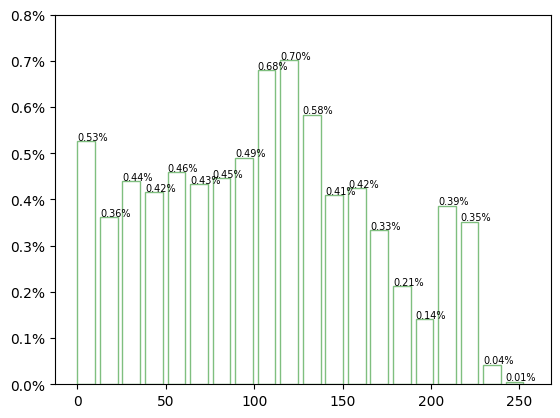

In [99]:
#Covert Image to a numpy array
bin = 20
imagearr = np.array(imageread)
#Creating an histogram from image use .ravel to flatten any image from 2d or 3d to 1d
arr = plt.hist(imagearr.ravel(),bins=bin,density=True,alpha=0.5,facecolor='none',edgecolor='g',width=10)
#take the generated values from the histogram plt function plt.hist and store them in a dictionary
textdict = dict(zip(arr[1],arr[0]))

#Modify Histo yticks!
#Get y_ticks and y_ticks labels (plt.yticks formula) - not sure why you need both but you do!
y_ticks, y_tick_labels = plt.yticks()

#Reformate the y_tickts and store them in y_tick_labels variable.
y_tick_labels = [f'{i*100:.1f}%' for i in y_ticks]
plt.yticks(y_ticks, y_tick_labels)

#Add labels on top of bar chart and fomrat the values to %. ("{:.2f}%".format(value*100))
for key,value in textdict.items():
    plt.text(key,value+0.0002,str("{:.2f}%".format(value*100)),fontsize=7,ha='left',va='top')
    

plt.show()

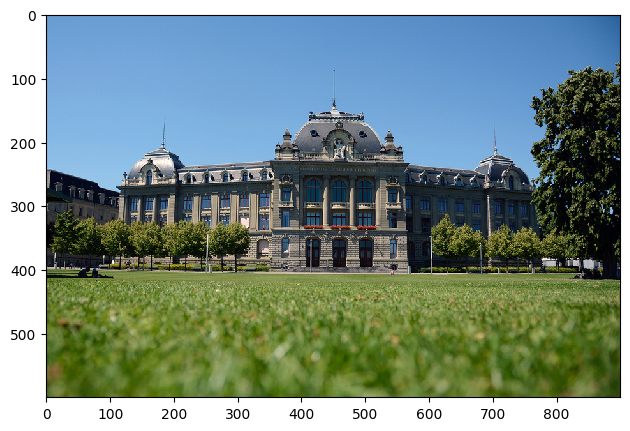

0 93 876
765 262 714


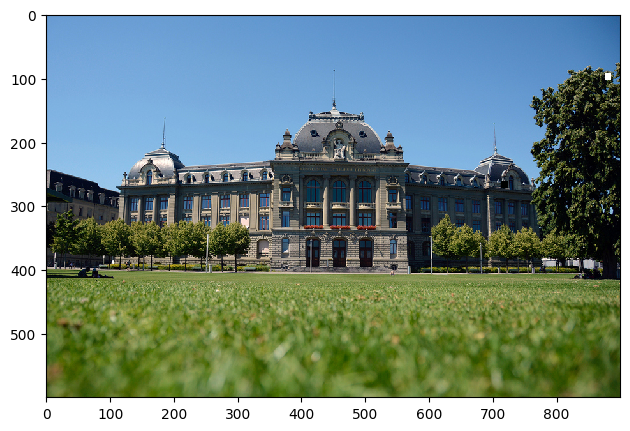

Most dark pixel is in location 876 , 93 with value 0
Most bright pixel is in location 262 , 714 with value 765
Channel of brightest pixel is:  [255 255 255]


In [101]:
#Find value of brightess and dargest piksel
#Read Image and show image
imagepath = 'C:/Users/Maaya/Desktop/unibe.jpg'
imshow = io.imread(imagepath)
io.imshow(imshow)
io.show()

#Ask about how gray scale can assist me in getting the result i am looking for
'''
imshowgray = rgb2gray(imshow)
io.imshow(imshowgray)
io.show()
data = np.array(imshowgray)
print(data)
print(np.size(data[data == 0]))
'''

#Open image
image = io.imread(imagepath)
#Convert image to a numpy array
imagel = np.array(image)

#Create 2 lists to store the relevant information!
darklist = []
brightlist = []

#Find Brightest and Darkest Pixel
dark = np.inf
bright = 0

for i in range(imagel.shape[0]):
    for j in range(imagel.shape[1]):
            #sum the total values of the pixels in a given x,y cordinates
            pixvalueddark = np.sum(image[i,j,:])
            pixvaluedbrigth = np.sum(image[i,j,:])
            if pixvalueddark < dark:
                dark = pixvalueddark
                pixdarkx,pixdarky = i,j
            if pixvaluedbrigth > bright:
                bright = pixvaluedbrigth
                pixbrightx,pixbrighty = i,j                

#Find Darkest and Brightest piksel!
print(dark,pixdarkx,pixdarky)
print(bright,pixbrightx,pixbrighty)

#Create Copy of Image to present the most black and the most bright pixels
i=10
locpixel = image.copy()
locpixel[pixdarkx:(pixdarkx+i),pixdarky:(pixdarky+i)] = [255,255,255]
locpixel[pixbrightx:(pixbrightx+i),pixbrighty:(pixbrighty+i)] = [0,0,0]
#image[93,876] = [255,255,255]
#print(image[93,876])
io.imshow(locpixel)
io.show()

print(f'Most dark pixel is in location {pixdarky} , {pixdarkx} with value {dark}')
print(f'Most bright pixel is in location {pixbrightx} , {pixbrighty} with value {bright}')  

#Bright pixel channel
channel = image[pixbrightx,pixbrighty]
print('Channel of brightest pixel is: ', channel)

In [104]:
#Reshape -1 to maintain get the size of the array matrix and make it one dimensional
#Open image
image = Image.open(imagepath)
#Covert image to numpy array
image = np.array(image)

#Reshape - -1 commands that array will turn into one dimensional array with size 3, for example noting 2 instead of 3 will remove the red levels in the original image array! 
Allpixels = image.reshape(-1, image.shape[-1])
# Convert the Allpixels to a set to get unique values
#Convert to a tupple, map and then set!!!! map(tuple,array) and this can be converted to a set.
uniquepixel = set(map(tuple, Allpixels))
#print("Unique Pixel Values:", unique_pixel_values)

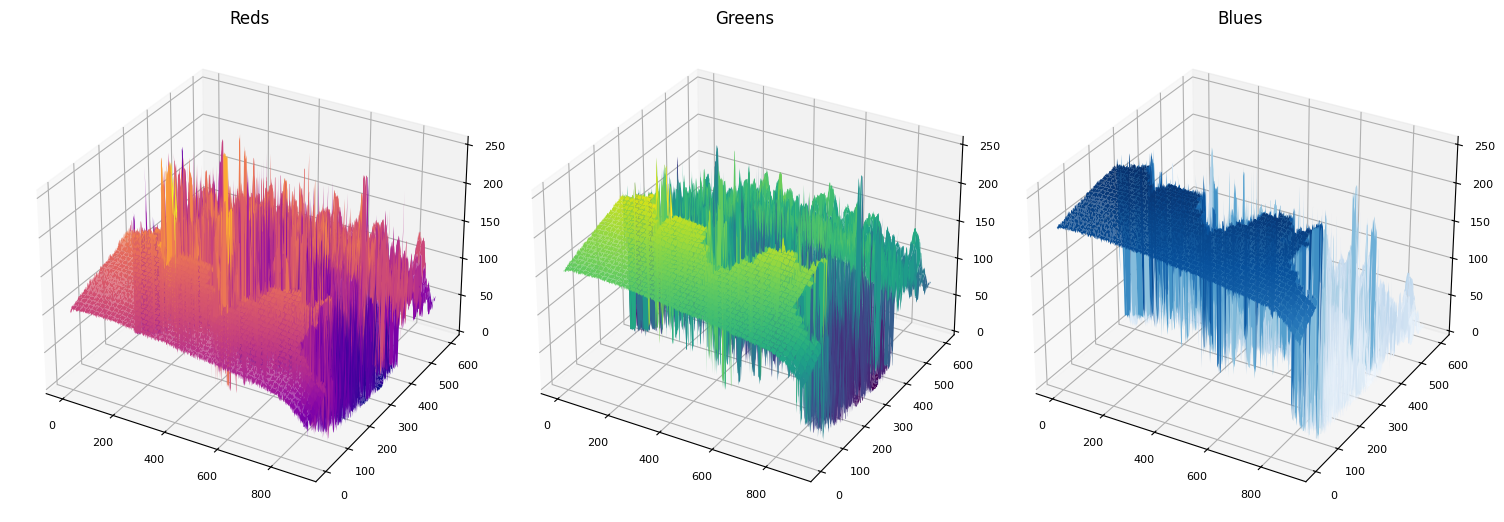

In [105]:
#Get Image to variable image
image = io.imread(imagepath)
#Convert Image to array
image = np.array(image)

#Get Reds from RGB which are located and position 0
reds = image[:,:,0]
greens = image[:,:,1]
blues = image[:,:,2]

#Important to create a mesh with the np.arange command - Create a meshgrid using the condinates of the image as given by the shape command
X,Y = np.meshgrid(np.arange(image.shape[1]),np.arange(image.shape[0]))

#Create figure and grid for figure
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,3,1,projection='3d')
ax1 = fig.add_subplot(1,3,2,projection='3d')
ax2 = fig.add_subplot(1,3,3,projection='3d')


#Plot 3D graph
surface = ax.plot_surface(X, Y, reds, cmap='plasma')
ax.tick_params( labelsize=8)
ax.set_title('Reds')
surface1 = ax1.plot_surface(X, Y, greens, cmap='viridis')
ax1.set_title('Greens')
ax1.tick_params( labelsize=8)
surface2 = ax2.plot_surface(X, Y, blues, cmap='Blues')
ax2.set_title('Blues')
ax2.tick_params( labelsize=8)
plt.tight_layout()
plt.show()

In [ ]:
#Look at green array 
perlist = []
#Define the percentile to look at.
percintile = 30

#The np.percentile function flatten the array to look at the value that at the 30% percentile
per = np.percentile(greens,percintile)
for i in range(greens.shape[0]):
    for j in range(greens.shape[1]):
        if greens[i,j] <= per:
            #Store the information on the condinates of the greens that are lower then 30% percentile
            perlist.append([i,j])
            
#print(perlist)
#Locations where green pixel color are smaller then 102 my list

In [ ]:
#Use Perlist that we came up with on the cell above! perlist
#Get Image to variable image
image = io.imread(imagepath)
#Convert Image to array
image = np.array(image)
#Change pixels in red channel to 255 at locations where green channels are smaller then per30
for i in perlist:
    image[i[0],i[1],0] = 255

io.imshow(image)
io.show()

In [ ]:
from ipywidgets import interact
@interact
def graph(a=(-5,5,0.1), b=(-5,5,0.1)):
    f = lambda x: a*x+b
    x0 = -10
    x1 = 10
    y0 = f(x0)
    y1 = f(x1)
    
    plt.plot([x0,x1],[y0,y1])
    plt.gca().set_aspect('equal')
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.grid(True)
    plt.show()
    

In [ ]:
from ipywidgets import interact
from colorama import Fore, Back, Style
#Create sliders using interact!
@interact(cropy=(0,100,1), cropx=(0,100,1))
#Define your function with def setting default values to cropx and cropy!!!
def graph(cropx=0, cropy=0):
    #Create Zero Square with one values
    imagezero = np.ones((100,100))
    io.imshow(imagezero)
    plt.xticks(np.arange(0,100,5),fontsize=6)
    plt.yticks(np.arange(0,100,5),fontsize=6)
    if cropx != 100 and cropy != 100:
        imagecroped = imagezero[0:imagezero.shape[0]-cropy,0:imagezero.shape[1]-cropx]
        io.imshow(imagecroped)
    else:
        print(Fore.RED + 'Value 100 Cannot be Chosen! Choose Another Value to Crop!')


In [ ]:
%%capture
#supress the output from this cell

f = lambda x, a: a*x + 2
x0 = -10
x1 = 10

a = 0

y0 = f(x0, a)
y1 = f(x1, a)


fig = plt.figure()
lines = plt.plot([x0,x1],[y0,y1])


plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid(True)



def animate(i):
    a = 0.5 * i
    y0 = f(x0,a)
    y1 = f(x1,a)
    l = lines[0]
    l.set_data([x0,x1],[y0,y1])
    return lines

ani = animation.FuncAnimation(fig,animate,frames=10)



In [ ]:
ani

In [ ]:
#Look at green array 
perlist = []
#Define the percentile to look at.
percintile = 30

#The np.percentile function flatten the array to look at the value that at the 30% percentile
per = np.percentile(greens,percintile)
for i in range(greens.shape[0]):
    for j in range(greens.shape[1]):
        if greens[i,j] <= per:
            #Store the information on the condinates of the greens that are lower then 30% percentile
            perlist.append([i,j])
            

In [ ]:
%%capture
#This line of code supress every output from this cell

#Load Image
imagepath = 'C:/Users/Maaya/Desktop/unibe.jpg'
#read image into a numpuy array
image = io.imread(imagepath)

#Allocate space for plot important for the animate animation.FuncAnimation 
fig, ax = plt.subplots()

#This function finds the location where greens pixels are higher than center percentile and store them in a list!
def location(image,per):
    greens = image[:,:,1]
    pix = np.percentile(greens,100 - per)
    mylist = []
    for i in range(greens.shape[0]):
        for j in range(greens.shape[1]):
            if greens[i,j] > pix:
                mylist.append([i,j])
    return mylist

#This is the animation function that creates the animations where changes to image happen
def animate(i):
    ax.clear() 
    per =  i
    mylist = location(image,per)
    newimage = np.copy(image)
    for coord in mylist:
        newimage[coord[0],coord[1],0] = 255
    im = ax.imshow(newimage)
    return im

ani = animation.FuncAnimation(fig,animate,frames=[0,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])

In [ ]:
ani